Для выполнения задания я выберу несколько распространенных алгоритмов кластеризации из разных категорий, а также подготовлю данные, подходящие для демонстрации работы каждого алгоритма. Мы будем использовать библиотеку sklearn для реализации и визуализации, а также matplotlib и seaborn для отображения результатов.

1. Подготовка окружения и создание данных

Сначала настроим окружение и создадим данные, на которых будем применять алгоритмы кластеризации.

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

sns.set(style="whitegrid")

# Генерация данных для кластеризации
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)


2. Алгоритм K-Means (частичная кластеризация)

K-means — это популярный метод частичной кластеризации, где данные распределяются в определенное количество кластеров, каждый из которых представлен своим центроидом. Процесс включает:

- Инициализацию центроидов случайным образом.
- Присвоение данных ближайшему центроиду.
- Обновление положения центроидов на основе среднего значения данных в кластере.
- Повторение шагов до сходимости.

C:\Users\Alexandr\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


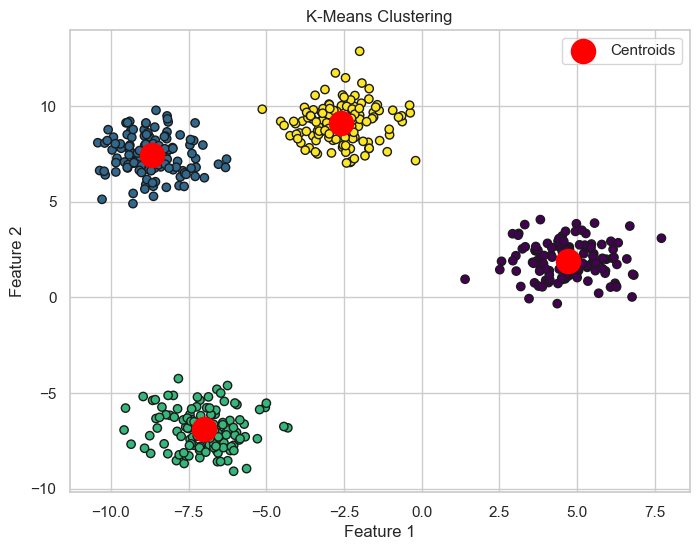

Silhouette Score for K-Means: 0.7911042588289479


In [2]:
# K-Means с данными типа blobs
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Оценка качества кластеризации с помощью силуэтного коэффициента
print(f'Silhouette Score for K-Means: {silhouette_score(X_blobs, y_kmeans)}')


3. DBSCAN (кластеризация, основанная на плотности)

DBSCAN — это алгоритм кластеризации на основе плотности, который объединяет точки, расположенные близко друг к другу, в кластеры, а удаленные точки считает шумом. Подходит для кластеров произвольной формы и устойчив к выбросам.

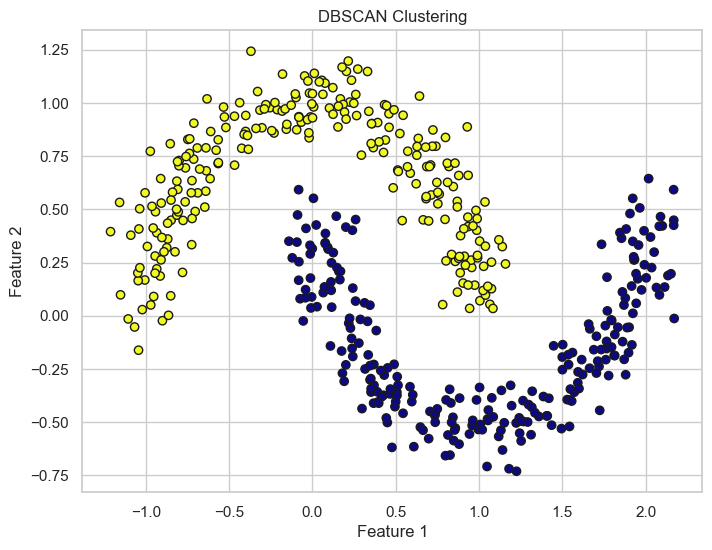

Silhouette Score for DBSCAN: 0.32744389724050826


In [3]:
# DBSCAN с данными типа moons
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, cmap='plasma', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Оценка качества кластеризации для DBSCAN
print(f'Silhouette Score for DBSCAN: {silhouette_score(X_moons[y_dbscan != -1], y_dbscan[y_dbscan != -1])}')


4. Агломеративная кластеризация (иерархическая кластеризация)

Агломеративная кластеризация создает иерархию кластеров, начиная с того, что каждая точка является своим кластером, и объединяя кластеры на каждом шаге до тех пор, пока не останется только один кластер. Мы также можем визуализировать результаты с помощью дендрограммы.

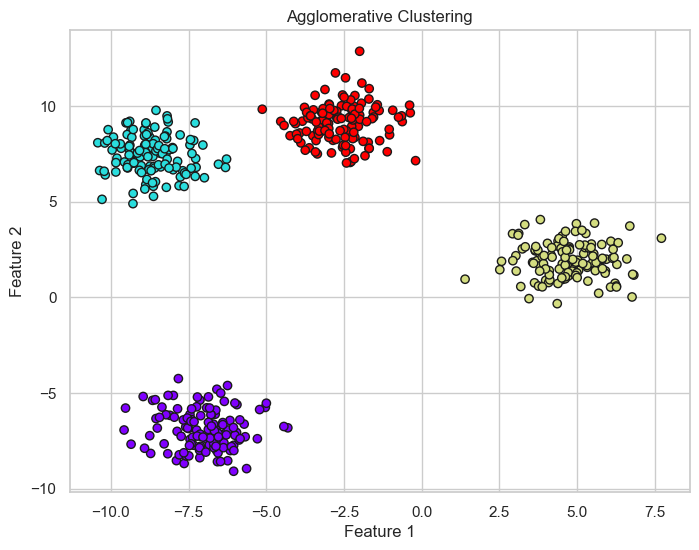

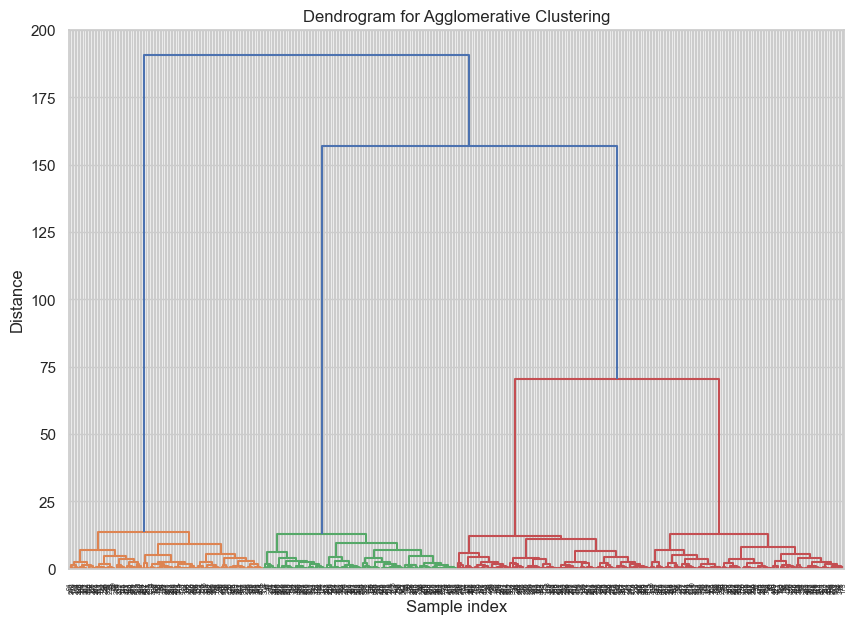

Silhouette Score for Agglomerative Clustering: 0.7911042588289479


In [4]:
# Агломеративная кластеризация
agg_clust = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agg = agg_clust.fit_predict(X_blobs)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_agg, cmap='rainbow', marker='o', edgecolor='k')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Дендрограмма для агломеративной кластеризации
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(X_blobs, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Оценка качества кластеризации
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_score(X_blobs, y_agg)}')


5. Gaussian Mixture Model (GMM, вероятностная кластеризация)

GMM — это вероятностный алгоритм, использующий смеси многомерных нормальных распределений для моделирования данных. На каждом шаге оценивается вероятность того, что точка принадлежит каждому кластеру, затем рассчитываются параметры распределений.

C:\Users\Alexandr\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


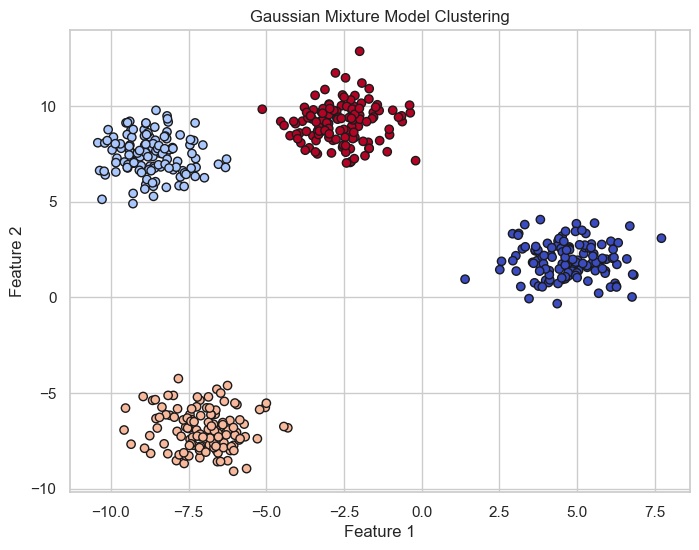

Silhouette Score for GMM: 0.7911042588289479


In [5]:
# Gaussian Mixture Model для данных типа blobs
gmm = GaussianMixture(n_components=4, random_state=42)
y_gmm = gmm.fit_predict(X_blobs)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_gmm, cmap='coolwarm', marker='o', edgecolor='k')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Оценка качества кластеризации
print(f'Silhouette Score for GMM: {silhouette_score(X_blobs, y_gmm)}')
